# Predictive Maintenance EDA Notebook

## Overview:
This notebook aims to explore and analyze the AI4I 2020 Predictive Maintenance Dataset for predictive maintenance tasks. The dataset contains information about a synthetic milling process, including various operational parameters and machine failure indicators. The primary objectives of this analysis are to understand the data's characteristics, identify patterns and relationships, and prepare the data for machine learning modeling.

## Problem Statement:
Machines are critical assets in modern industries, and ensuring their optimal performance is crucial for business operations. Traditional maintenance strategies often lead to unplanned downtime and increased costs. Predictive maintenance offers a proactive approach to address these challenges by leveraging machine learning techniques to monitor, predict, and prevent machine failures. In this project, we aim to develop machine learning models for predictive maintenance in response to Industry 4.0 initiatives. Specifically, we focus on two supervised learning tasks:

- Failure Prediction (Binary Classification): Predict whether a machine failure will occur.
- Type of Failure Detection (Multi-class Classification): Determine the type of failure based on operational parameters.
  
## Dataset Information:
- Dataset Name: AI4I 2020 Predictive Maintenance Dataset
- Source: UCI Machine Learning Repository
- DOI: https://doi.org/10.24432/C5HS5C
- Description: The dataset contains 10000 records of a synthetic milling process, with columns including operational parameters (e.g., air temperature, process temperature, rotational speed, torque, tool wear) and machine failure indicators (binary and multi-class). The goal is to utilize this dataset for building predictive maintenance models.
## Tasks:
- Explore the data distribution, summary statistics, and correlations.
- Visualize relationships between features and machine failures.
- Identify any missing values or anomalies in the dataset.
- Preprocess the data for machine learning modeling.

## Description

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, the data provided by the UCI repository is a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of their knowledge. The dataset consists of 10 000 data points stored as rows with 14 features in columns:

- UID: unique identifier ranging from 1 to 10000;
- Product ID: consisting of a letter L, M, or H for low (60% of all products), medium (30%) and high (10%) as product quality variants and a variant-specific serial number;
- Air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K;
- Process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K;
- Rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise;
- Torque [Nm]: torque values are normally distributed around 40 Nm with a standard deviation of 10 Nm and no negative values;
- Tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process;
- Machine failure: label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.
The machine failure consists of five independent failure modes:
- tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins;
- heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm;

- power failure (PWF):the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails;

- overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain;
- random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. If at least one of the above failure modes is true, the process fails and the

## Exploratory Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from ydata_profiling import ProfileReport
from scipy.stats import skew

In [2]:
# read and import file
df = pd.read_csv(r"C:\Users\USER\Documents\Python Scripts\Machine learning\Neural networks\Predictive Maintenance\predictive-maintenance-supervised-learning\data\ai4i2020.csv")
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

In [3]:
df["Machine failure"].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

## Inspecting data's basic informatiom

In [4]:
# shape and size of data
display(df.shape)
display(df.size)

(10000, 14)

140000

In [5]:
# data types of each column
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [6]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
# check for missing values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

* There are no missing values in this dataset

In [ ]:
#plot to verify no missing values 
plt.figure(figsize=(15,15))
plot_kws={"s": 1}
sns.heatmap(df.isna().transpose(),
            cmap='cividis',
            linewidths=0.0,
           ).set_facecolor('white')

- There is no missing data;
- There are no duplicate values;
- Six columns are numerical features, including UDI;
- Three columns are categorical features, including ProductID.

`To make this distinction more clear we set numeric columns to float type`

In [ ]:
# Set numeric columns dtype to float
df['Tool wear [min]'] = df['Tool wear [min]'].astype('float64')
df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype('float64')

 ## ID Columns 
In the exploratory data analysis (EDA) phase of my project, it is crucial to scrutinize and refine my dataset before delving into technical analyses. Among my initial considerations are the ID columns: "UDI" and "Product ID". While the "UDI" column merely mirrors the index of my dataframe, the "Product ID" column comprises an initial letter followed by a sequence of five numbers.

On closer inspection, we observe that the initial letter in the "Product ID" corresponds to the machine type, suggesting potential redundancy with the "Type" feature. Moreover, the numerical sequences within "Product ID" delineate intervals based on this same feature. ConsequentlyIwe can confidently conclude that the "Product ID" column does not provide additional insights beyond what is already captured by the "Type" feature.

Given this redundancy and the unlikely scenario where the failure of a machine depends on its identifiI, we opt to remove the "Product ID" column fthe our dataset. This decision streamlithe our dataset, eliminating unnecessary complexity and ensuring tthe our model focuses solely on pertinent featuroject.

In [ ]:
# Drop ID columns
data = df.copy()
data.drop(columns=['UDI','Product ID'], inplace=True)

In [ ]:
# The following pie chart shows the percentages of machines by Type:

# Pie chart of Type percentage
value = data['Type'].value_counts()
Type_percentage = 100*value/data.Type.shape[0]
labels = Type_percentage.index.array
x = Type_percentage.array
plt.pie(x, labels = labels, colors=sns.color_palette('tab10')[0:3], autopct='%.0f%%')
plt.title('Machine Type percentage')
plt.show()


In [ ]:
# Define a dictionary to map numeric values to labels
machine_failure_mapping = {0: 'No Failure', 1: 'Failure'}

# Plot countplot
plt.figure(figsize=(25, 7))
plt.subplot(1, 2, 1)
data['Type'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.subplot(1, 2, 2)
sns.countplot(x='Type', hue='Machine failure', data=data.replace({'Machine failure': machine_failure_mapping}))
plt.show()

In [ ]:
# pie chart percentage of machine failure
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data['Machine failure'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x = 'Machine failure', data = data)
plt.show()

In [ ]:
# Determine "Failure Type" based on one-hot encoded columns
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
data['Failure Type'] = data.apply(lambda x: next((f for f in failure_types if x[f] == 1), 'No Failure'), axis=1)

# Drop the one-hot encoded columns
data.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

# Now data will contain only the 'Failure Type' column and other columns except the one-hot encoded columns
data


In [ ]:
# Define a dictionary to map numeric values to labels
failure_type_mapping = {'No Failure': 0, 'PWF': 1, 'OSF': 2, 'HDF': 3, 'TWF': 4} 

# Plot countplot
plt.figure(figsize=(25, 7))
plt.subplot(1, 2, 1)
data['Type'].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.subplot(1, 2, 2)
# Convert 'Failure Type' column to string type before plotting
sns.countplot(x='Type', hue='Failure Type', data=data.replace({'Failure Type': failure_type_mapping}).astype(str))
plt.show()


In [ ]:
plt.figure(figsize = (25,9))
plt.subplot(1,2,1)
data['Failure Type'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0.1,0.3,0.3,0.4,0.5,0.6))
plt.subplot(1,2,2)
sns.countplot(x = 'Failure Type', data = data)
plt.show()

In [124]:
# Getting an overview of the feature, targets and their relationships with each other with data_profiling
Profile = ProfileReport(data, title = "Pandas Profiling Report")
Profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

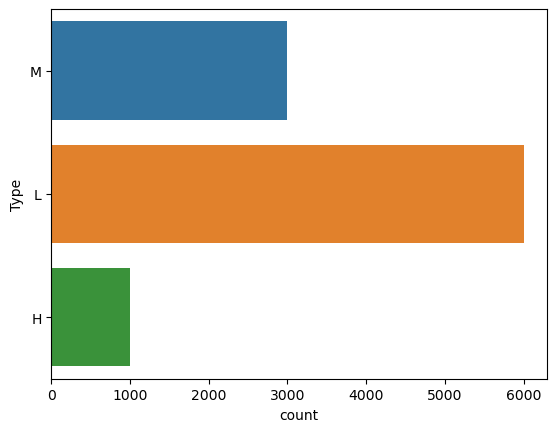

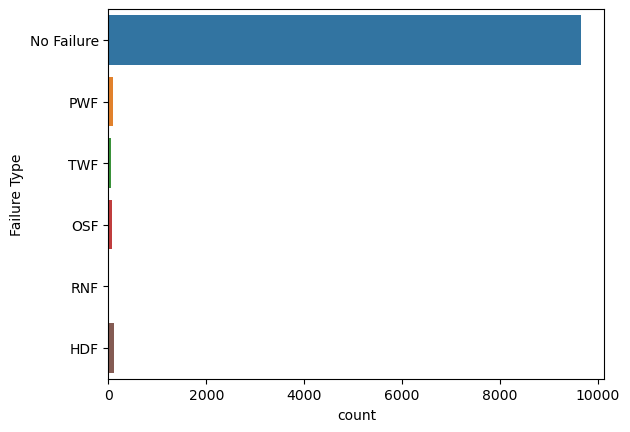

In [125]:
for feature in data.dtypes[data.dtypes == "object"].index:
    sns.countplot(y=feature, data=data)
    plt.show()

## Target anomalies 
Here, I observed the distribution of the target to find any imbalances and correct them before dividing the dataset. 

- The first anomaly respect to dataset’s description is that when the failure is random (RNF), the Machine Failure feature is not set to 1.
- The second is Machine failure is set to 1 when all types of failures are set to 0. We cannot understand if there really was a failure or not.

In [126]:
# Create a new DataFrame containing instances where 'Machine failure' is 0 and 'Failure Type' is 'Random Failures'
target_anomaly_1 = data[(data['Machine failure'] == 0) & (data['Failure Type'] == 'RNF')][['Machine failure', 'Failure Type']]

target_anomaly_1

Machine failure Failure Type
1221                0          RNF
1302                0          RNF
1748                0          RNF
2072                0          RNF
2559                0          RNF
3065                0          RNF
3452                0          RNF
5471                0          RNF
5489                0          RNF
5495                0          RNF
5509                0          RNF
5553                0          RNF
5639                0          RNF
6091                0          RNF
6913                0          RNF
6960                0          RNF
7488                0          RNF
7868                0          RNF

`Fortunately the machine failure RNF occurs in only 18 observations and it has a random nature therefore not predictable so i decided to remove these rows.`

In [127]:
# Filter out target anomalies where 'Machine failure' is 0 and 'Failure Type' is 'Random Failures'
target_anomaly_1 = data[(data['Machine failure'] == 0) & (data['Failure Type'] == 'RNF')]

# Drop the target anomalies from the original DataFrame
data.drop(target_anomaly_1.index, inplace=True)

In [128]:
data[(data['Machine failure'] == 0) & (data['Failure Type'] == 'RNF')][['Machine failure', 'Failure Type']]

Empty DataFrame
Columns: [Machine failure, Failure Type]
Index: []

In [129]:
# Filter out target anomaly portion of data where Machine failure=1 but no failure cause is specified
target_anomaly_2 = data[(data['Machine failure'] == 1) & (data['Failure Type'] == 'No Failure')][['Machine failure', 'Failure Type']]

target_anomaly_2

Machine failure Failure Type
1437                1   No Failure
2749                1   No Failure
4044                1   No Failure
4684                1   No Failure
5536                1   No Failure
5941                1   No Failure
6478                1   No Failure
8506                1   No Failure
9015                1   No Failure

In [130]:
# Filter out target anomalies where 'Machine failure' is 1 and 'Failure Type' is 'No Failure'
target_anomaly_2 = data[(data['Machine failure'] == 1) & (data['Failure Type'] == 'No Failure')]

# Drop the target anomalies from the original DataFrame
data.drop(target_anomaly_2.index, inplace=True)

In [131]:
data[(data['Machine failure'] == 1) & (data['Failure Type'] == 'No Failure')]

Empty DataFrame
Columns: [Type, Air temperature [K], Process temperature [K], Rotational speed [rpm], Torque [Nm], Tool wear [min], Machine failure, Failure Type]
Index: []

## Outliers inspection

The goal of this section is to check if the dataset contains any outlier, which are usually misleading for machine learning algorithms. We begin by looking at a statistical report of the numerical features.

In [132]:
# Select only numerical columns for skewness calculation
numerical_columns = data.select_dtypes(include=['float64', 'int64'])

# Calculate skewness for each numerical feature
skewness = pd.DataFrame({'Skewness': numerical_columns.apply(lambda x: x.skew())})

# Display skewness values
print(skewness)

                         Skewness
Air temperature [K]      0.115473
Process temperature [K]  0.016186
Rotational speed [rpm]   1.992859
Torque [Nm]             -0.009719
Tool wear [min]          0.028494
Machine failure          5.221459


In [133]:
data.describe()

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count          9973.000000              9973.000000             9973.000000   
mean            300.003259               310.004031             1538.893212   
std               2.000548                 1.483692              179.412171   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

       Torque [Nm]  Tool wear [min]  Machine failure  
count  9973.000000      9973.000000      9973.000000  
mean     39.978993       107.921087         0.033089  
std       9.966805        63.649152         0.178879  
min       3.800000         0.000000         0.000000  
25%      33.200000        53.000000         0.000000  
50%      40.100000       108.000000         0.000000  
75%      46.700000       162.000000         0.000000  
max      76.600000       253.000000         1.000000

* We can guess the presence of outliers in Rotational Speed and Torque because the maximum is very different from the third quartile. To make this consideration more concrete we take a closer look at the situation with `boxplots`, and use `histograms` to understand the distribution.

C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

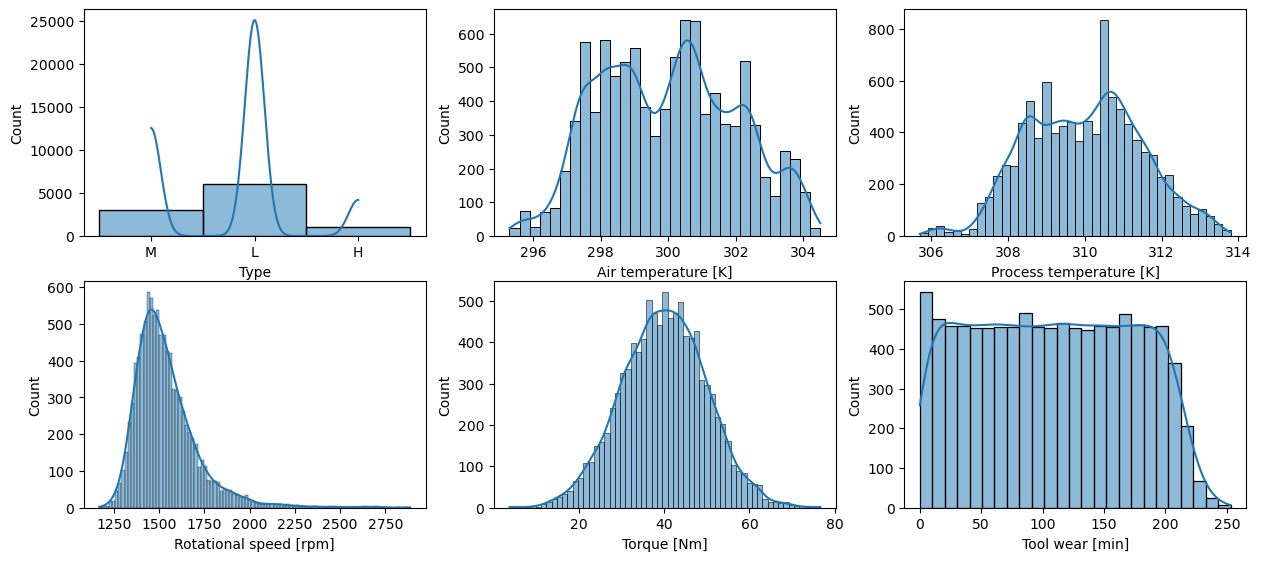

In [134]:
plt.figure(figsize=(15,10))
columns_to_exclude = ['UDI','Product ID']
num_subplots = min(9, len(data.columns) - len(columns_to_exclude))
for i, col in enumerate(data.columns, 1):
    if col not in columns_to_exclude and i <= num_subplots:
        plt.subplot(3, 3, i)
        sns.histplot(data[col], kde=True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_9280\3559492973.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 1]['Air temperature [K]'], label='Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_9280\3559492973.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 0]['Air temperature [K]'], label='Non-Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packag

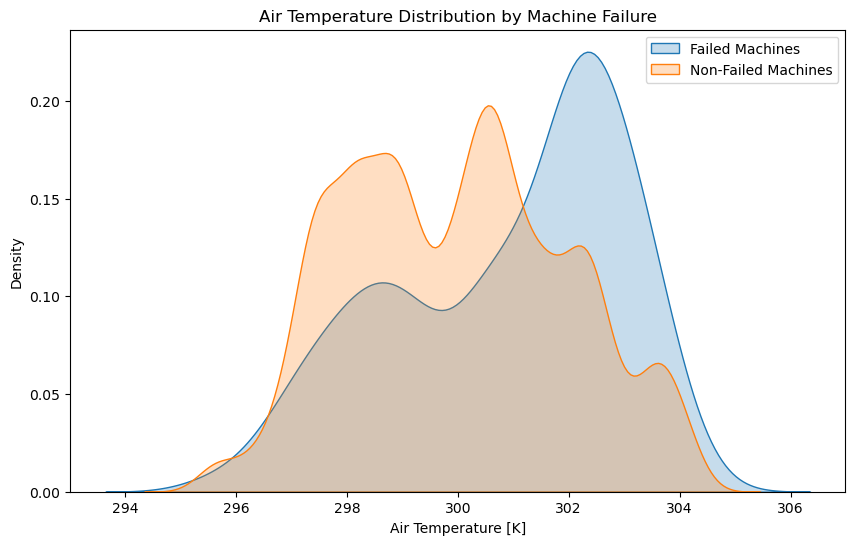

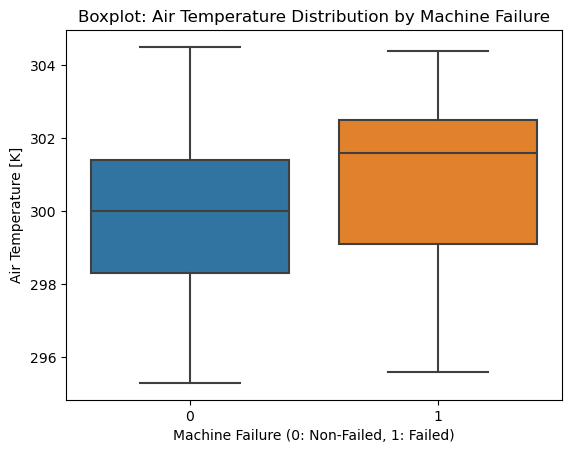

C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


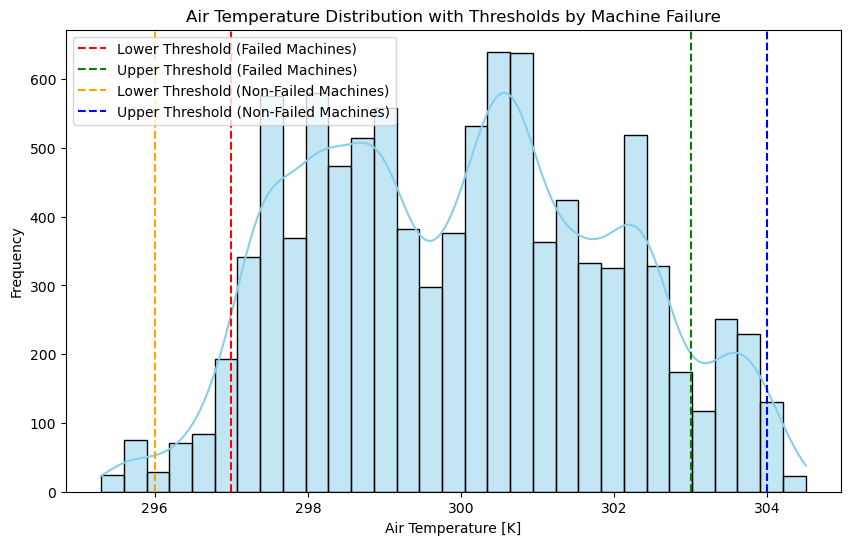

In [135]:
# Step 1: Identify Peak Patterns with Machine Failure Context
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Machine failure'] == 1]['Air temperature [K]'], label='Failed Machines', shade=True)
sns.kdeplot(data[data['Machine failure'] == 0]['Air temperature [K]'], label='Non-Failed Machines', shade=True)
plt.title('Air Temperature Distribution by Machine Failure')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Density')
plt.legend()
plt.show()

# Step 2: Analyze Relationships with Machine Failure
sns.boxplot(x='Machine failure', y='Air temperature [K]', data=data)
plt.title('Boxplot: Air Temperature Distribution by Machine Failure')
plt.xlabel('Machine Failure (0: Non-Failed, 1: Failed)')
plt.ylabel('Air Temperature [K]')
plt.show()

# Step 3: Detect Deviations in Relation to Machine Failure
# Example: Set thresholds for acceptable temperature range for failed and non-failed machines
threshold_min_failed = 297  # Example lower threshold for failed machines
threshold_max_failed = 303  # Example upper threshold for failed machines
threshold_min_non_failed = 296  # Example lower threshold for non-failed machines
threshold_max_non_failed = 304  # Example upper threshold for non-failed machines

# Plot real-time temperature readings with threshold boundaries for failed and non-failed machines
plt.figure(figsize=(10, 6))
sns.histplot(data['Air temperature [K]'], kde=True, color='skyblue', edgecolor='black')
plt.axvline(threshold_min_failed, color='red', linestyle='--', label='Lower Threshold (Failed Machines)')
plt.axvline(threshold_max_failed, color='green', linestyle='--', label='Upper Threshold (Failed Machines)')
plt.axvline(threshold_min_non_failed, color='orange', linestyle='--', label='Lower Threshold (Non-Failed Machines)')
plt.axvline(threshold_max_non_failed, color='blue', linestyle='--', label='Upper Threshold (Non-Failed Machines)')
plt.title('Air Temperature Distribution with Thresholds by Machine Failure')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Frequency')
plt.legend()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_9280\1129875020.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 1]['Process temperature [K]'], label='Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_9280\1129875020.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 0]['Process temperature [K]'], label='Non-Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\sit

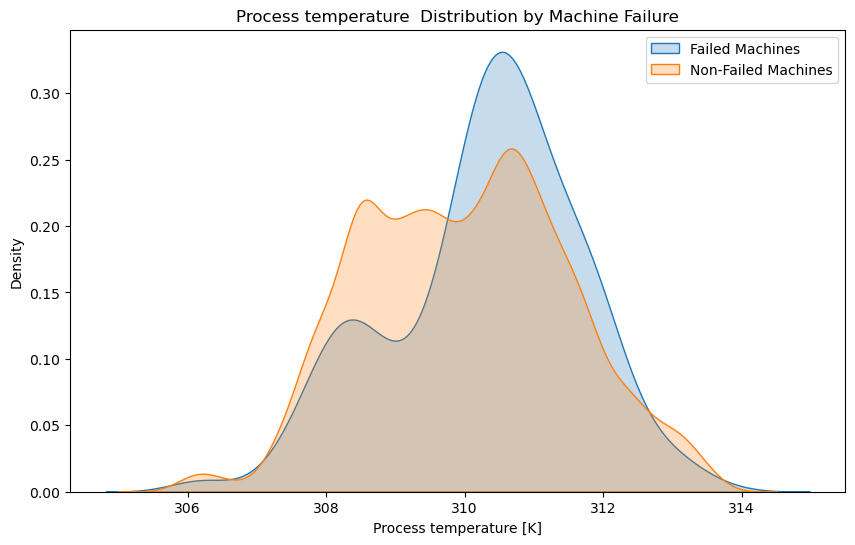

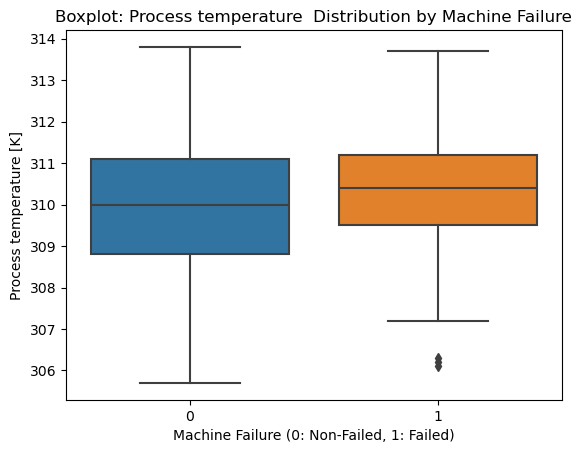

C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


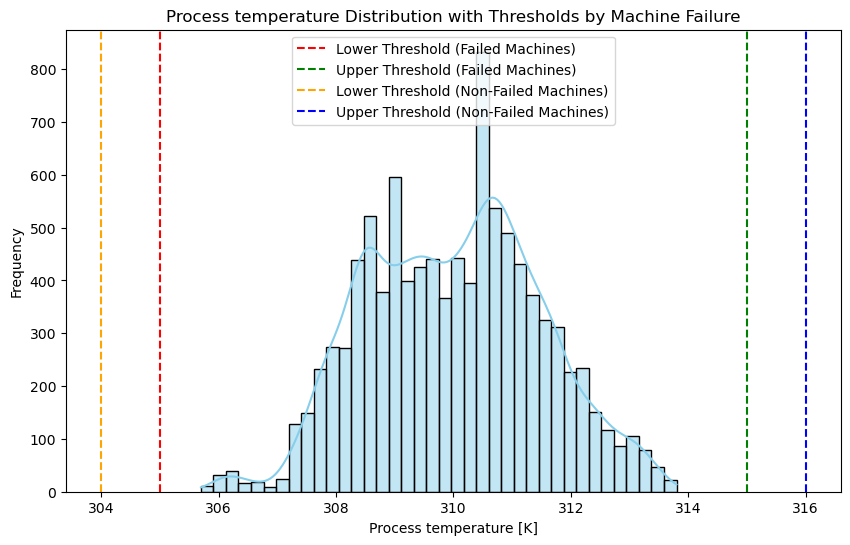

In [136]:
# Identify Peak Patterns with Machine Failure Context Process temperature [K]	Rotational speed [rpm]	Torque [Nm]	Tool wear [min]
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Machine failure'] == 1]['Process temperature [K]'], label='Failed Machines', shade=True)
sns.kdeplot(data[data['Machine failure'] == 0]['Process temperature [K]'], label='Non-Failed Machines', shade=True)
plt.title('Process temperature  Distribution by Machine Failure')
plt.xlabel('Process temperature [K]')
plt.ylabel('Density')
plt.legend()
plt.show()

# Step 2: Analyze Relationships with Machine Failure
sns.boxplot(x='Machine failure', y='Process temperature [K]', data=data)
plt.title('Boxplot: Process temperature  Distribution by Machine Failure')
plt.xlabel('Machine Failure (0: Non-Failed, 1: Failed)')
plt.ylabel('Process temperature [K]')
plt.show()

# Step 3: Detect Deviations in Relation to Machine Failure
# Example: Set thresholds for acceptable temperature range for failed and non-failed machines
threshold_min_failed =  305   # Example lower threshold for failed machines
threshold_max_failed = 315  # Example upper threshold for failed machines
threshold_min_non_failed = 304  # Example lower threshold for non-failed machines
threshold_max_non_failed = 316  # Example upper threshold for non-failed machines

# Plot real-time temperature readings with threshold boundaries for failed and non-failed machines
plt.figure(figsize=(10, 6))
sns.histplot(data['Process temperature [K]'], kde=True, color='skyblue', edgecolor='black')
plt.axvline(threshold_min_failed, color='red', linestyle='--', label='Lower Threshold (Failed Machines)')
plt.axvline(threshold_max_failed, color='green', linestyle='--', label='Upper Threshold (Failed Machines)')
plt.axvline(threshold_min_non_failed, color='orange', linestyle='--', label='Lower Threshold (Non-Failed Machines)')
plt.axvline(threshold_max_non_failed, color='blue', linestyle='--', label='Upper Threshold (Non-Failed Machines)')
plt.title('Process temperature Distribution with Thresholds by Machine Failure')
plt.xlabel('Process temperature [K]')
plt.ylabel('Frequency')
plt.legend()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_9280\1177904852.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 1]['Rotational speed [rpm]'], label='Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_9280\1177904852.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 0]['Rotational speed [rpm]'], label='Non-Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-

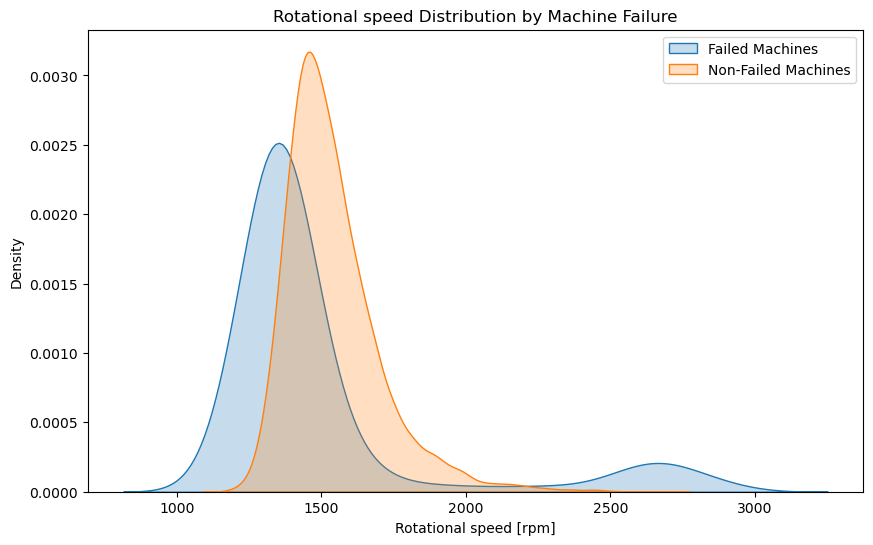

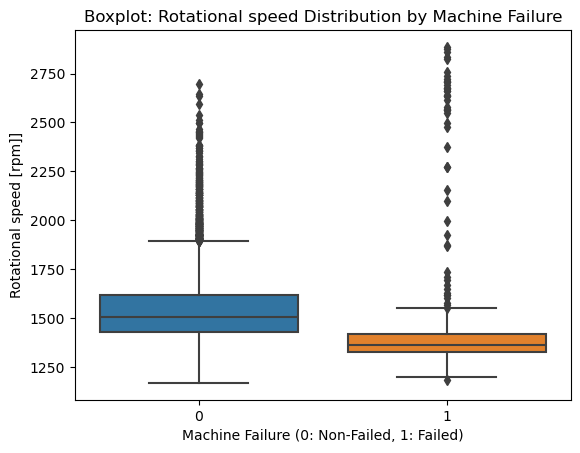

In [137]:
# Step 1: Identify Peak Patterns with Machine Failure Context Process temperature [K]	Rotational speed [rpm]	Torque [Nm]	Tool wear [min]
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Machine failure'] == 1]['Rotational speed [rpm]'], label='Failed Machines', shade=True)
sns.kdeplot(data[data['Machine failure'] == 0]['Rotational speed [rpm]'], label='Non-Failed Machines', shade=True)
plt.title('Rotational speed Distribution by Machine Failure')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Density')
plt.legend()
plt.show()

# Step 2: Analyze Relationships with Machine Failure
sns.boxplot(x='Machine failure', y='Rotational speed [rpm]', data=data)
plt.title('Boxplot: Rotational speed Distribution by Machine Failure')
plt.xlabel('Machine Failure (0: Non-Failed, 1: Failed)')
plt.ylabel('Rotational speed [rpm]]')
plt.show()

# Step 3: Detect Deviations in Relation to Machine Failure
# Example: Set thresholds for acceptable temperature range for failed and non-failed machines
threshold_min_failed =  305   # Example lower threshold for failed machines
threshold_max_failed = 315  # Example upper threshold for failed machines
threshold_min_non_failed = 304  # Example lower threshold for non-failed machines
threshold_max_non_failed = 316  # Example upper threshold for non-failed machines

# # Plot real-time temperature readings with threshold boundaries for failed and non-failed machines
# plt.figure(figsize=(10, 6))
# sns.histplot(data['Rotational speed [rpm]'], kde=True, color='skyblue', edgecolor='black')
# plt.axvline(threshold_min_failed, color='red', linestyle='--', label='Lower Threshold (Failed Machines)')
# plt.axvline(threshold_max_failed, color='green', linestyle='--', label='Upper Threshold (Failed Machines)')
# plt.axvline(threshold_min_non_failed, color='orange', linestyle='--', label='Lower Threshold (Non-Failed Machines)')
# plt.axvline(threshold_max_non_failed, color='blue', linestyle='--', label='Upper Threshold (Non-Failed Machines)')
# plt.title('Rotational speed Distribution with Thresholds by Machine Failure')
# plt.xlabel('Rotational speed [rpm]')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_9280\1519294957.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 1]['Torque [Nm]'], label='Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_9280\1519294957.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 0]['Torque [Nm]'], label='Non-Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldc

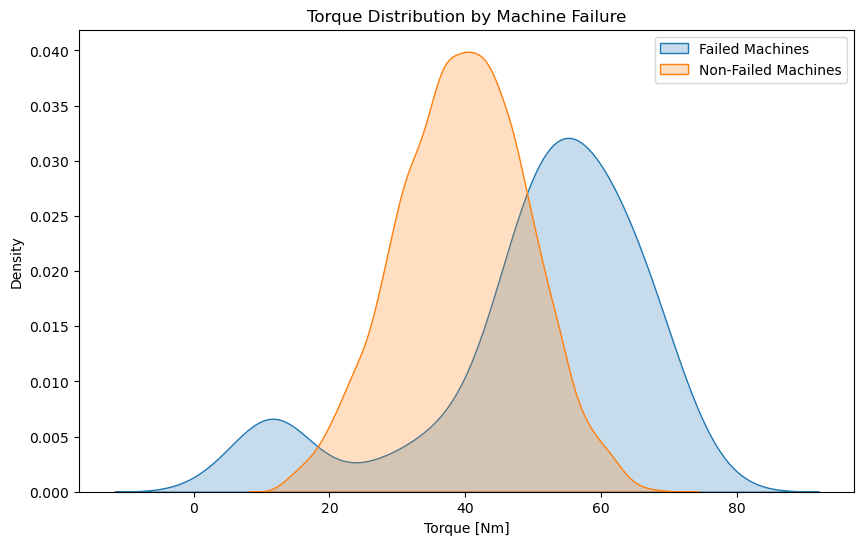

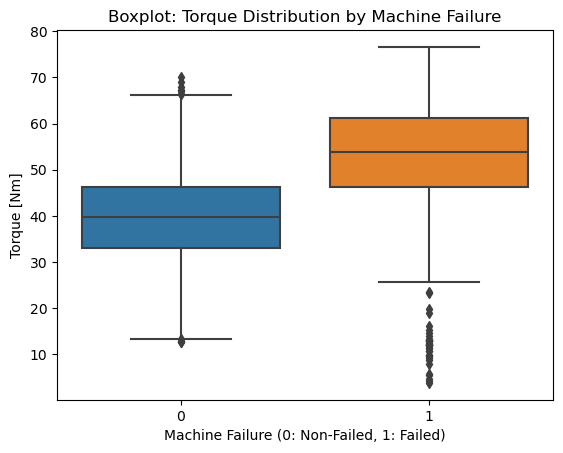

In [138]:
# Step 1: Identify Peak Patterns with Machine Failure Context Process temperature [K]	Rotational speed [rpm]	Torque [Nm]	Tool wear [min]
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Machine failure'] == 1]['Torque [Nm]'], label='Failed Machines', shade=True)
sns.kdeplot(data[data['Machine failure'] == 0]['Torque [Nm]'], label='Non-Failed Machines', shade=True)
plt.title('Torque Distribution by Machine Failure')
plt.xlabel('Torque [Nm]')
plt.ylabel('Density')
plt.legend()
plt.show()

# Step 2: Analyze Relationships with Machine Failure
sns.boxplot(x='Machine failure', y='Torque [Nm]', data=data)
plt.title('Boxplot: Torque Distribution by Machine Failure')
plt.xlabel('Machine Failure (0: Non-Failed, 1: Failed)')
plt.ylabel('Torque [Nm]')
plt.show()

# Step 3: Detect Deviations in Relation to Machine Failure
# Example: Set thresholds for acceptable temperature range for failed and non-failed machines
threshold_min_failed =  305   # Example lower threshold for failed machines
threshold_max_failed = 315  # Example upper threshold for failed machines
threshold_min_non_failed = 304  # Example lower threshold for non-failed machines
threshold_max_non_failed = 316  # Example upper threshold for non-failed machines

# # Plot real-time temperature readings with threshold boundaries for failed and non-failed machines
# plt.figure(figsize=(10, 6))
# sns.histplot(data['Rotational speed [rpm]'], kde=True, color='skyblue', edgecolor='black')
# plt.axvline(threshold_min_failed, color='red', linestyle='--', label='Lower Threshold (Failed Machines)')
# plt.axvline(threshold_max_failed, color='green', linestyle='--', label='Upper Threshold (Failed Machines)')
# plt.axvline(threshold_min_non_failed, color='orange', linestyle='--', label='Lower Threshold (Non-Failed Machines)')
# plt.axvline(threshold_max_non_failed, color='blue', linestyle='--', label='Upper Threshold (Non-Failed Machines)')
# plt.title('Rotational speed Distribution with Thresholds by Machine Failure')
# plt.xlabel('Rotational speed [rpm]')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_9280\383393232.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 1]['Tool wear [min]'], label='Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_9280\383393232.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Machine failure'] == 0]['Tool wear [min]'], label='Non-Failed Machines', shade=True)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn

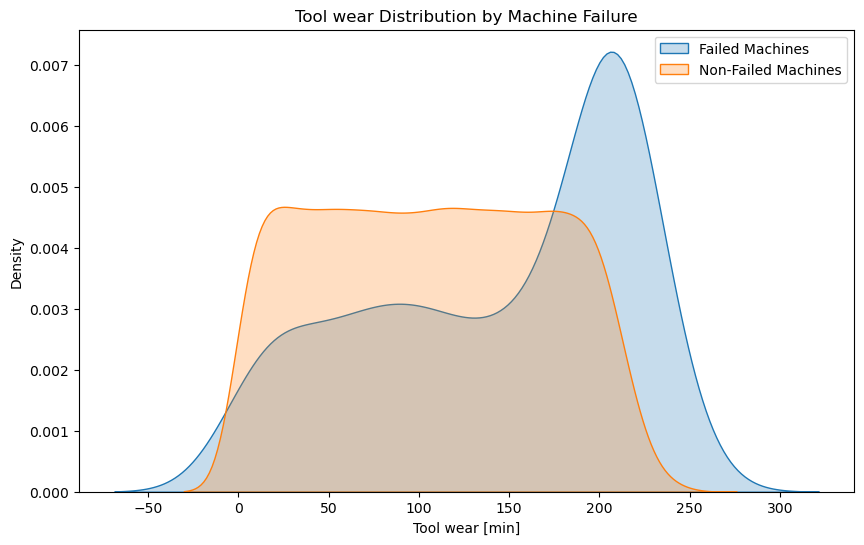

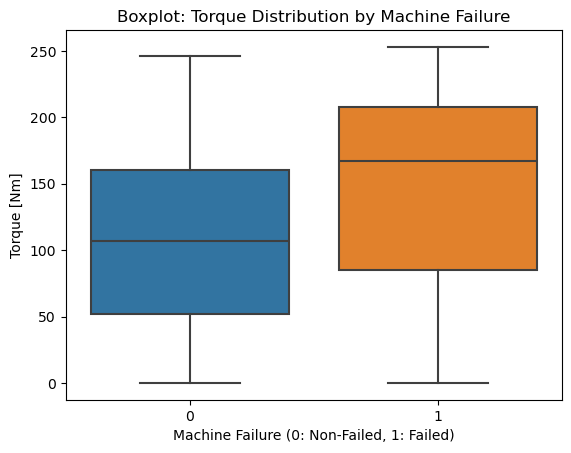

In [139]:
# Step 1: Identify Peak Patterns with Machine Failure Context Process temperature [K]	Rotational speed [rpm]	Torque [Nm]	Tool wear [min]
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Machine failure'] == 1]['Tool wear [min]'], label='Failed Machines', shade=True)
sns.kdeplot(data[data['Machine failure'] == 0]['Tool wear [min]'], label='Non-Failed Machines', shade=True)
plt.title('Tool wear Distribution by Machine Failure')
plt.xlabel('Tool wear [min]')
plt.ylabel('Density')
plt.legend()
plt.show()

# Step 2: Analyze Relationships with Machine Failure
sns.boxplot(x='Machine failure', y='Tool wear [min]', data=data)
plt.title('Boxplot: Torque Distribution by Machine Failure')
plt.xlabel('Machine Failure (0: Non-Failed, 1: Failed)')
plt.ylabel('Torque [Nm]')
plt.show()

# Step 3: Detect Deviations in Relation to Machine Failure
# Example: Set thresholds for acceptable temperature range for failed and non-failed machines
# threshold_min_failed =  305   # Example lower threshold for failed machines
# threshold_max_failed = 315  # Example upper threshold for failed machines
# threshold_min_non_failed = 304  # Example lower threshold for non-failed machines
# threshold_max_non_failed = 316  # Example upper threshold for non-failed machines

# # Plot real-time temperature readings with threshold boundaries for failed and non-failed machines
# plt.figure(figsize=(10, 6))
# sns.histplot(data['Rotational speed [rpm]'], kde=True, color='skyblue', edgecolor='black')
# plt.axvline(threshold_min_failed, color='red', linestyle='--', label='Lower Threshold (Failed Machines)')
# plt.axvline(threshold_max_failed, color='green', linestyle='--', label='Upper Threshold (Failed Machines)')
# plt.axvline(threshold_min_non_failed, color='orange', linestyle='--', label='Lower Threshold (Non-Failed Machines)')
# plt.axvline(threshold_max_non_failed, color='blue', linestyle='--', label='Upper Threshold (Non-Failed Machines)')
# plt.title('Rotational speed Distribution with Thresholds by Machine Failure')
# plt.xlabel('Rotational speed [rpm]')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()


"In my exploratory data analysis (EDA), we utilized boxplots to identify potential outliers within the dataset. However, upon closer examination, it became evident that the outliers identified for the Torque feature may not accurately represent true anomalies. This discrepancy arises from the fact that the distribution of Torque values closely follows a Gaussian (normal) distribution, where extreme values are better detected using the 3σ rule rather than the Interquartile Range (IQR) method typically employed in boxplot analysis.

Furthermore, my analysis revealed that the distribution of Rotational Speed exhibits skewness, indicating a departure from symmetry typically observed in Gaussian distributions. Despite this skewness, it is worth noting that certain observations with notably high Rotational Speed values may serve as indicators of potential machine failures.

Given these observations, I have opted to retain the identified outliers for further investigation, withholding any immediate actions. My decision is informed by the understanding that outlier handling should be approached judiciously, considering domain expertise, specific analytical objectives, and potential implications on subsequent modeling efforts.

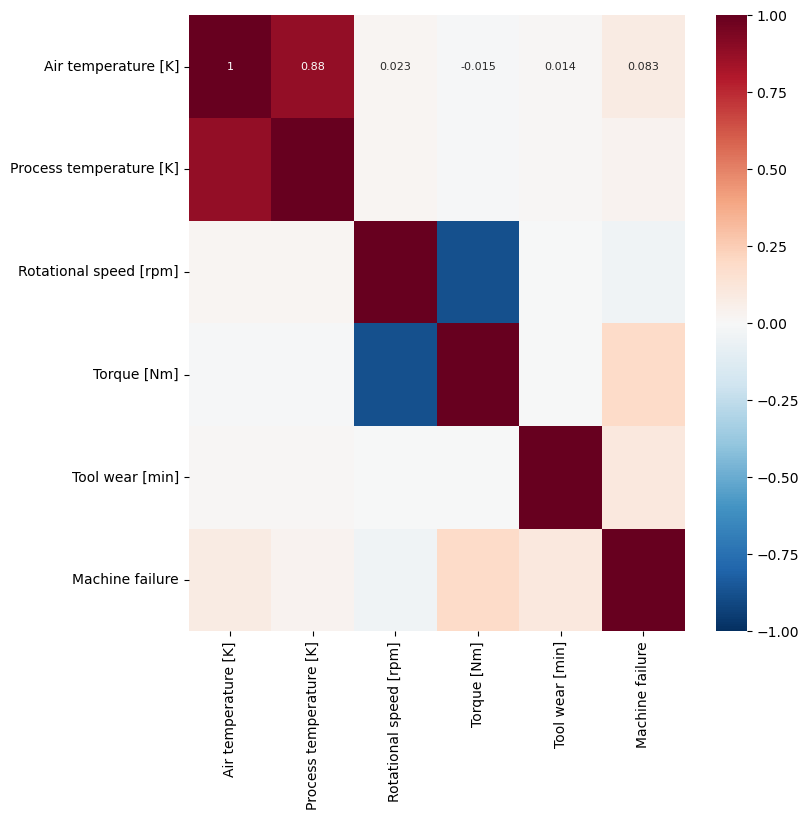

In [140]:
# Extract the numerical columns from the dataset
num_vars = data.select_dtypes(include=['int64', 'float64'])

# plot correlation with heatmap
# plot correlation with heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(num_vars.corr(), vmin=-1.0, vmax=1.0, center=0, cmap='RdBu_r', annot=True, annot_kws={"size": 8})
plt.show()

In [141]:
numerical_features = data.select_dtypes(include=['float64', 'int64'])

# Calculate skewness for each numerical feature
skewness = numerical_features.apply(lambda x: skew(x.dropna()))

# Print skewness values
print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
Air temperature [K]        0.115456
Process temperature [K]    0.016183
Rotational speed [rpm]     1.992559
Torque [Nm]               -0.009718
Tool wear [min]            0.028490
Machine failure            5.220674
dtype: float64


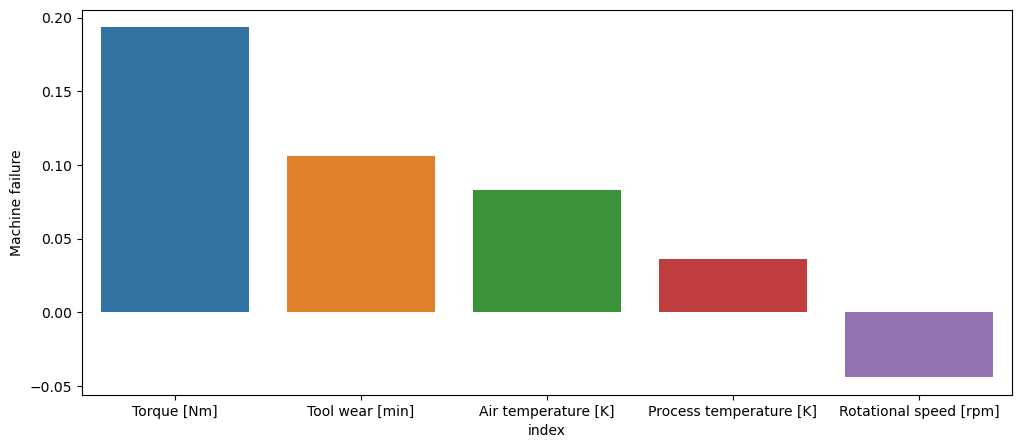

In [142]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'index', y = 'Machine failure',data = num_vars.corr()['Machine failure'].sort_values(ascending = False).reset_index()[1:])
plt.show()

In [143]:
# Understand how Air temperature and the relationship with the Type affect machine_failure.

# Group by 'household_size' and 'relationship_with_head' and count occurrences of bank accounts
count_machine_failure = data.groupby(['Air temperature [K]', 'Type'])['Machine failure'].value_counts().reset_index(name='count')

# Print the result
# count_machine_failure

C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


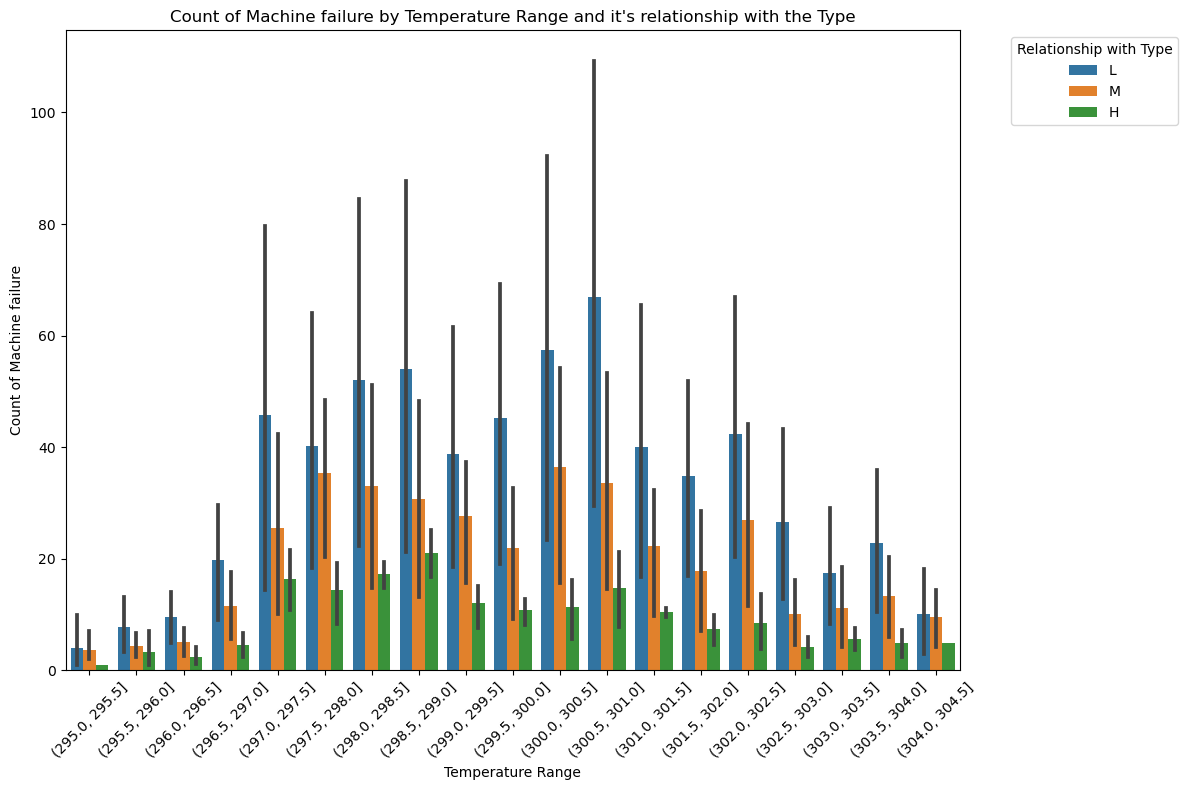

In [144]:
# Define temperature ranges
temperature_ranges = [295 + i*0.5 for i in range(20)]  # Define the ranges as per your preference



# Discretize 'Air temperature [K]' into temperature bins
count_machine_failure['Temperature Range'] = pd.cut(count_machine_failure['Air temperature [K]'], bins=temperature_ranges)

# Plot the count of individuals with bank accounts for each temperature range and relationship with type
plt.figure(figsize=(12, 8))
sns.barplot(data=count_machine_failure, x='Temperature Range', y='count', hue='Type')
plt.xlabel('Temperature Range')
plt.ylabel('Count of Machine failure')
plt.title("Count of Machine failure by Temperature Range and it's relationship with the Type")
plt.xticks(rotation=45)
plt.legend(title='Relationship with Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\USER\anaconda3\envs\certisims\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


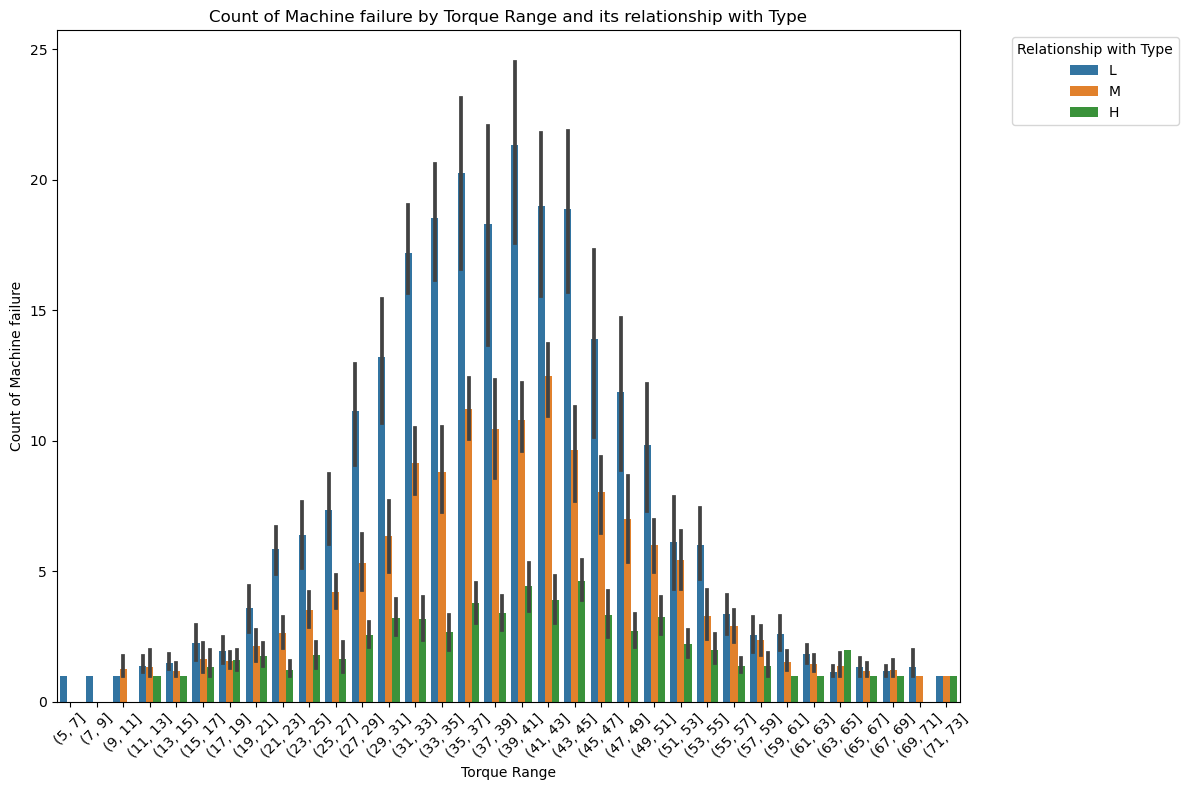

In [145]:
# Group by 'Torque [Nm]' and 'Type' and count occurrences of 'Machine failure'
count_machine_failure = df.groupby(['Torque [Nm]', 'Type'])['Machine failure'].value_counts().reset_index(name='count')

# Define torque ranges
torque_ranges = [5 + i*2 for i in range(35)]  # Define the ranges as per your preference

# Discretize 'Torque [Nm]' into torque bins
count_machine_failure['Torque Range'] = pd.cut(count_machine_failure['Torque [Nm]'], bins=torque_ranges)

# Plot the count of machine failures for each torque range and relationship with type
plt.figure(figsize=(12, 8))
sns.barplot(data=count_machine_failure, x='Torque Range', y='count', hue='Type')
plt.xlabel('Torque Range')
plt.ylabel('Count of Machine failure')
plt.title("Count of Machine failure by Torque Range and its relationship with Type")
plt.xticks(rotation=45)
plt.legend(title='Relationship with Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


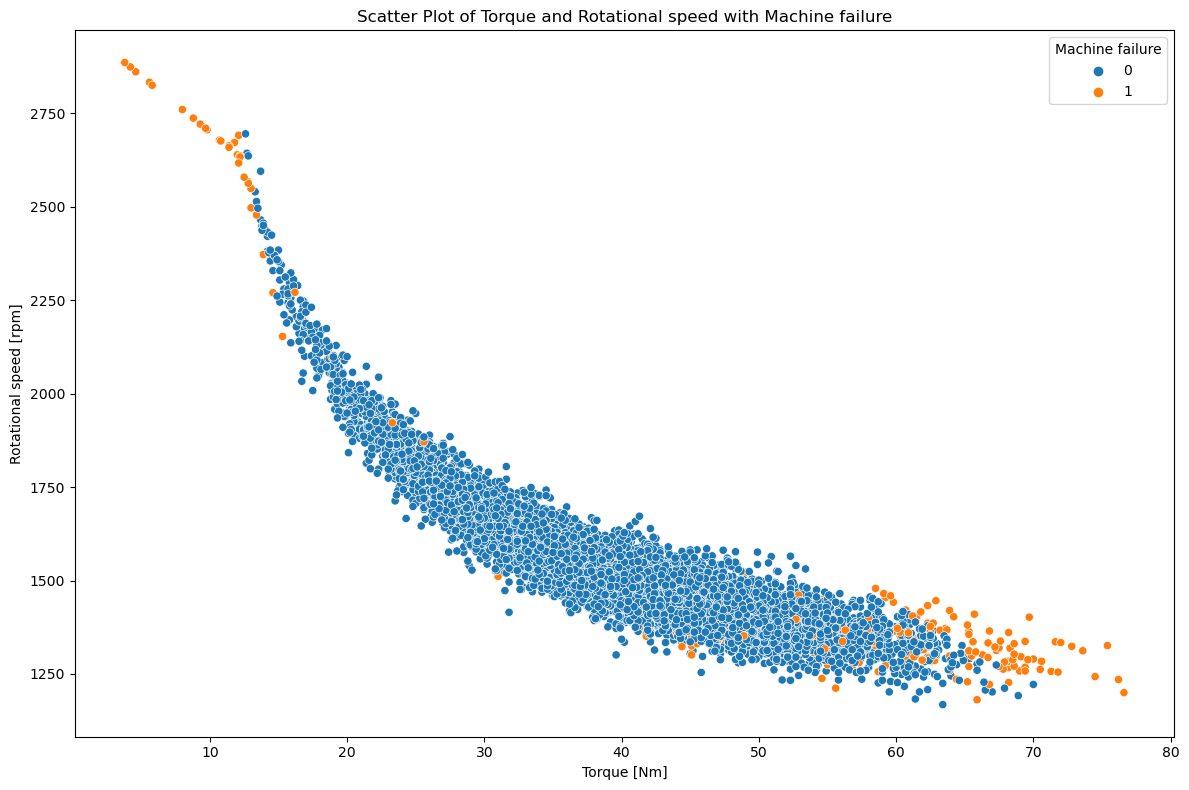

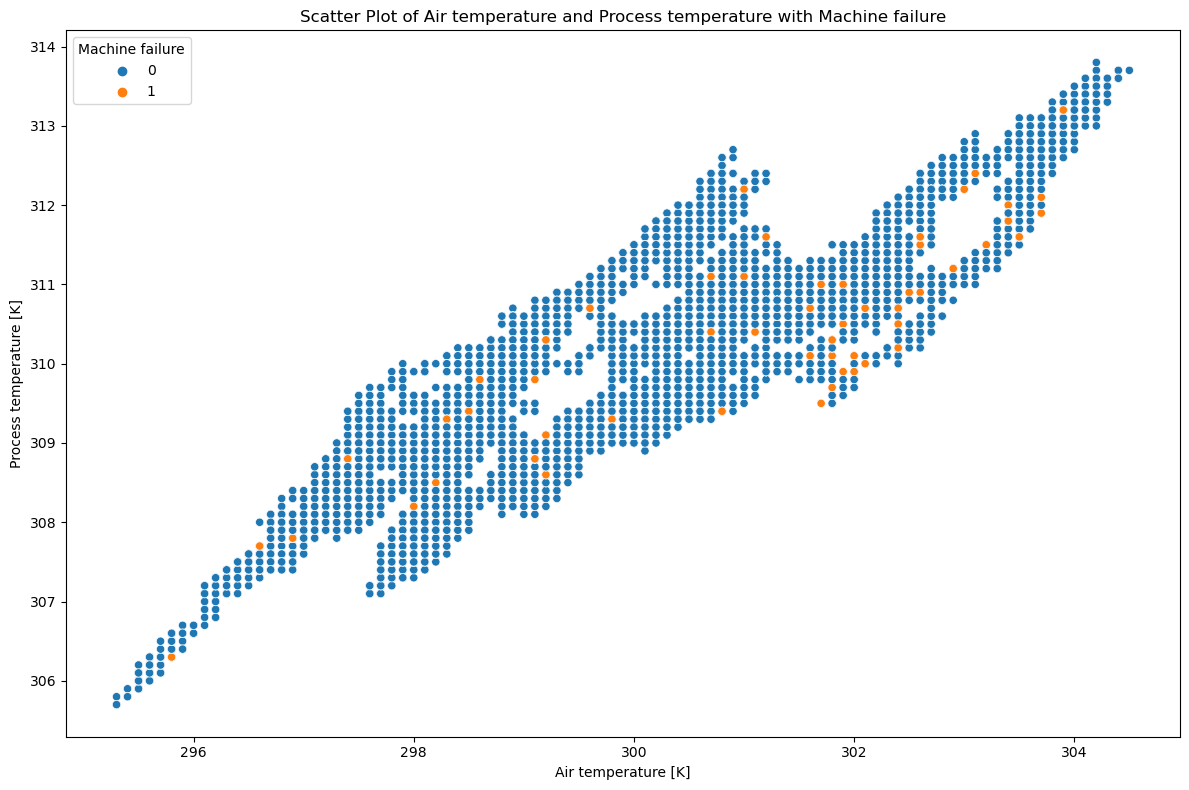

In [146]:

# Scatter plot for Torque and Rotational speed with Machine failure as hue
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Torque [Nm]', y='Rotational speed [rpm]', hue='Machine failure')
plt.title('Scatter Plot of Torque and Rotational speed with Machine failure')
plt.xlabel('Torque [Nm]')
plt.ylabel('Rotational speed [rpm]')
plt.legend(title='Machine failure')
plt.tight_layout()
plt.show()

# Scatter plot for Air temperature and Process temperature with Machine failure as hue
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Air temperature [K]', y='Process temperature [K]', hue='Machine failure')
plt.title('Scatter Plot of Air temperature and Process temperature with Machine failure')
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.legend(title='Machine failure')
plt.tight_layout()
plt.show()


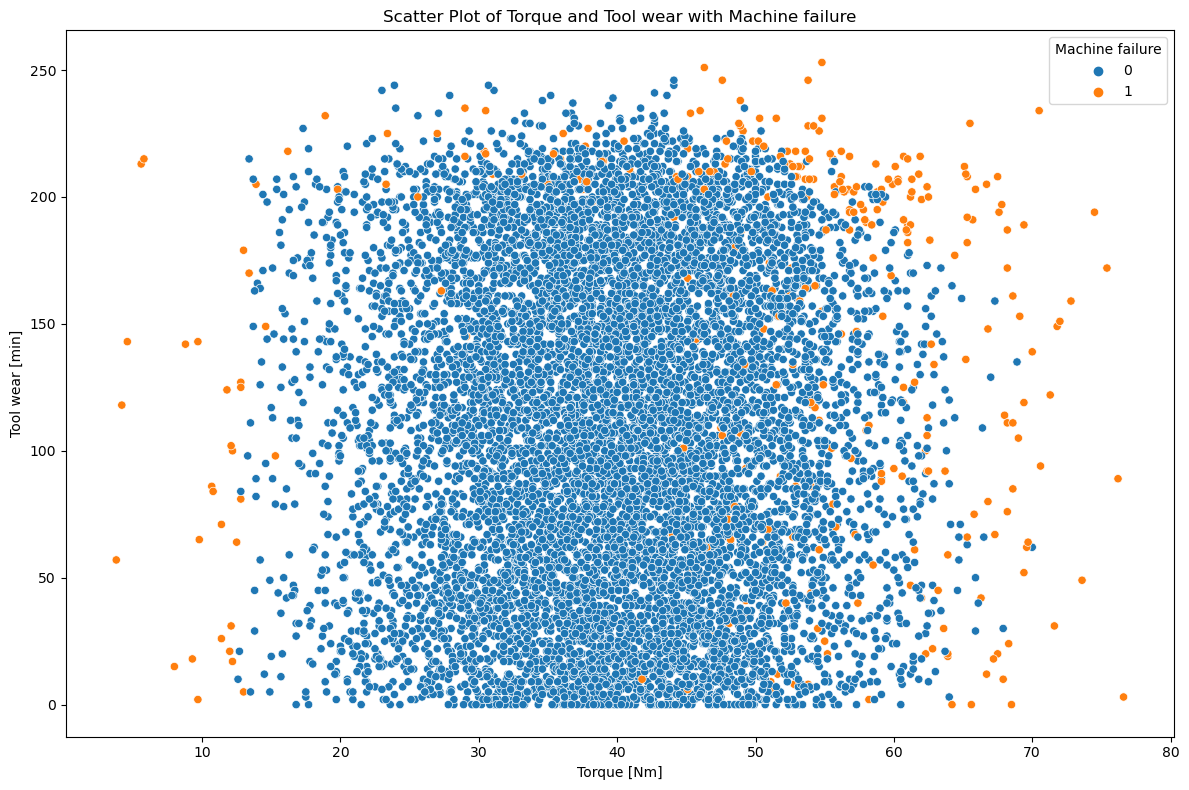

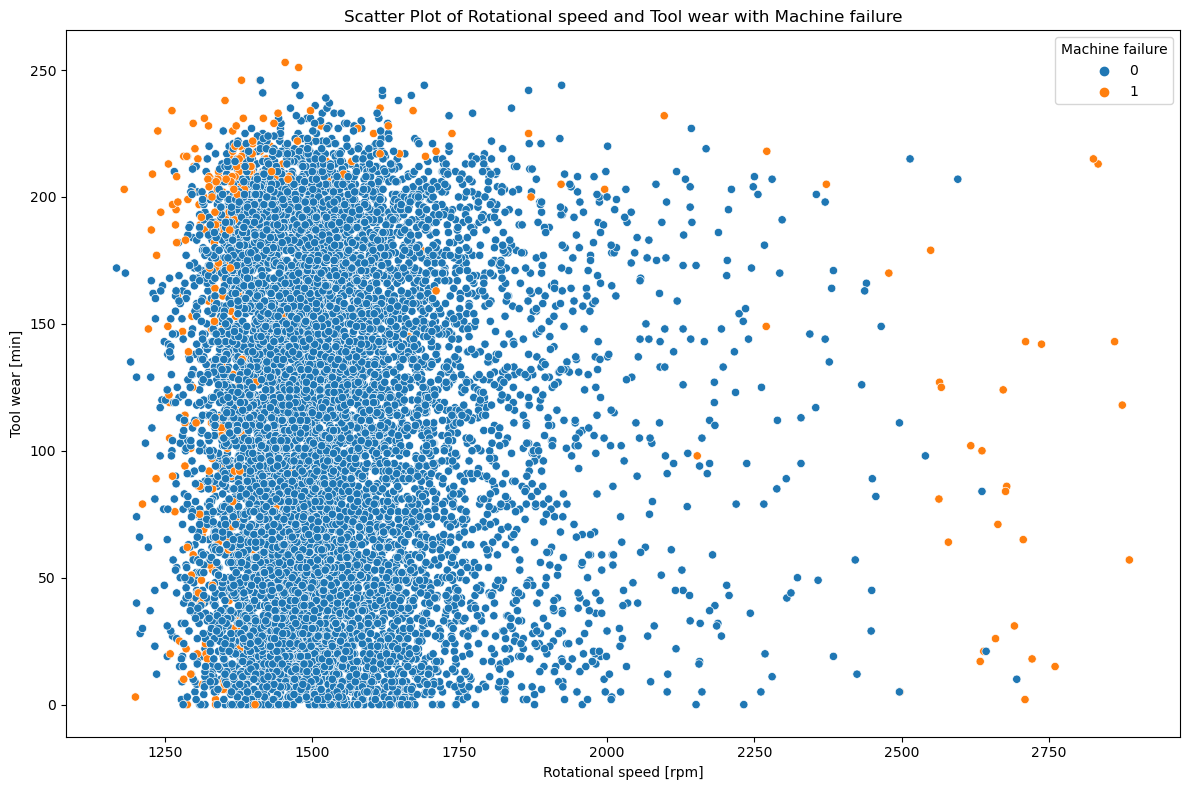

In [147]:
# Scatter plot for Torque and Tool wear with Machine failure as hue
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Torque [Nm]', y='Tool wear [min]', hue='Machine failure')
plt.title('Scatter Plot of Torque and Tool wear with Machine failure')
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')
plt.legend(title='Machine failure')
plt.tight_layout()
plt.show()

# Scatter plot for Rotational speed and Tool wear with Machine failure as hue
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Rotational speed [rpm]', y='Tool wear [min]', hue='Machine failure')
plt.title('Scatter Plot of Rotational speed and Tool wear with Machine failure')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Tool wear [min]')
plt.legend(title='Machine failure')
plt.tight_layout()
plt.show()


Machine type M tends to experience higher maximum tool wear compared to types L and H.
However, the average tool wear remains relatively consistent across all machine types.
These insights can inform maintenance strategies, indicating that while machine type M may require more frequent attention due to higher maximum wear, regular maintenance practices can help maintain consistent performance across all machine types.

## EDA with respect to the multi class target column

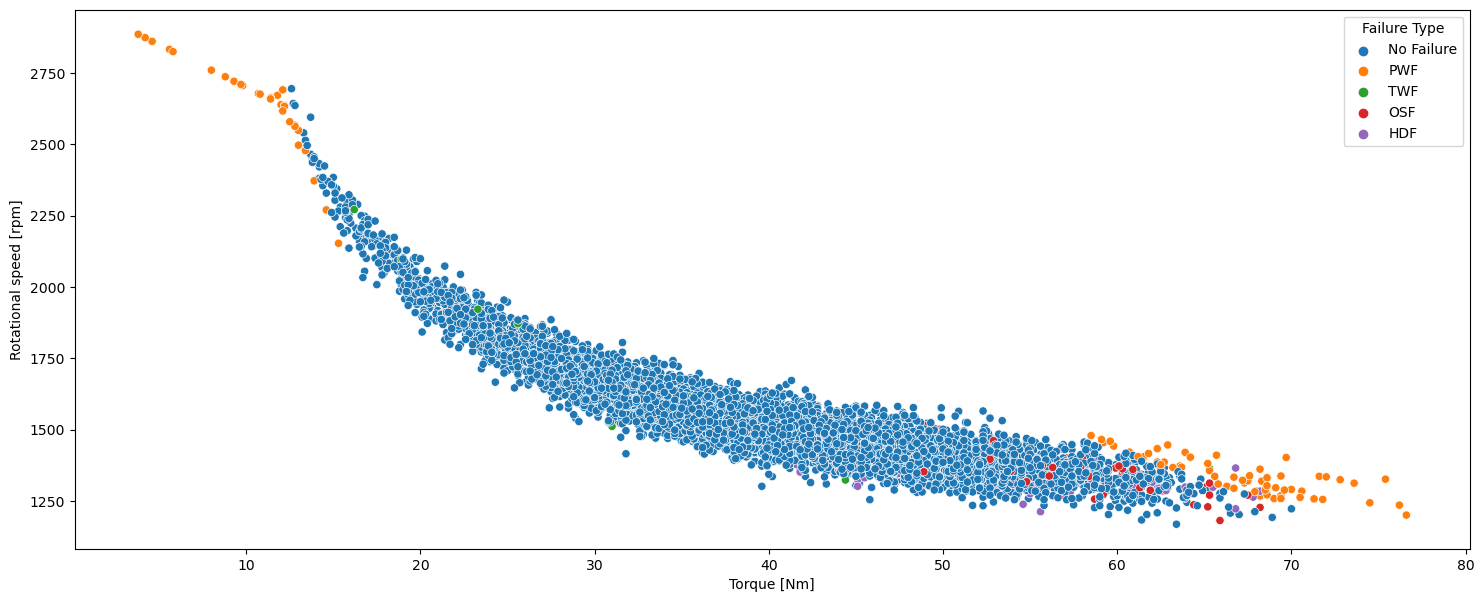

In [148]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=data, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");

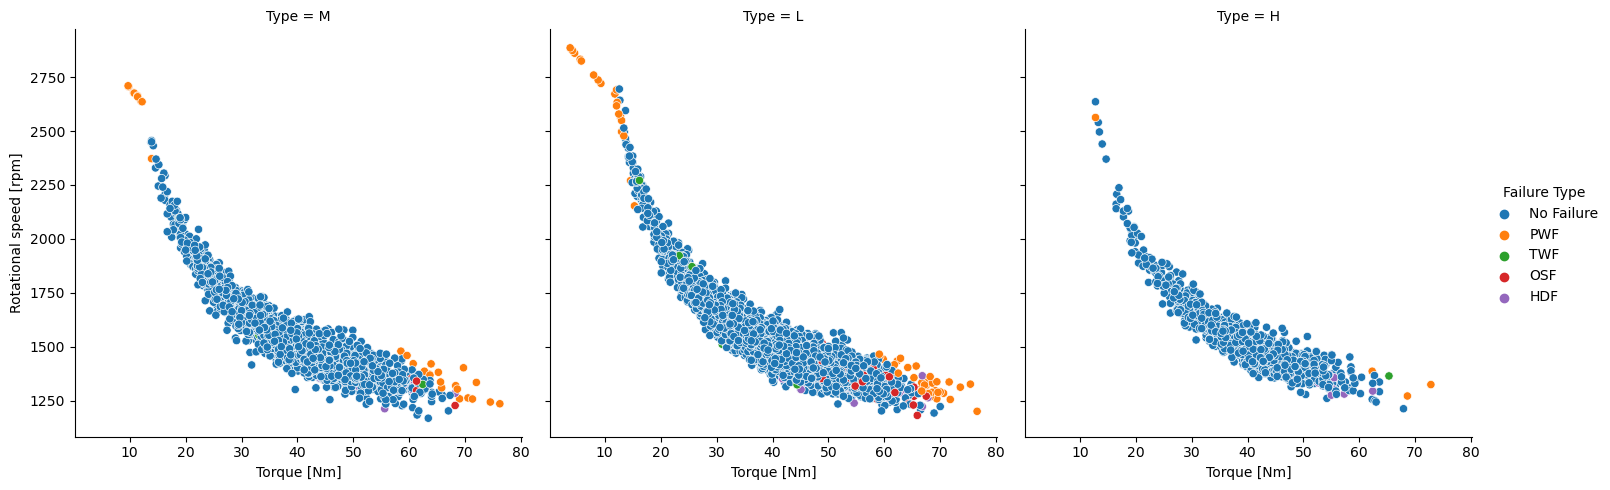

In [149]:
sns.relplot(data=data, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10');

## Feature selection

In [1]:
data

NameError: name 'data' is not defined

In [152]:
encoded_data = data.copy()

In [153]:
encoded_data

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                     1551.0         42.8              0.0                0   
1                     1408.0         46.3              3.0                0   
2                     1498.0         49.4              5.0                0   
3                     1433.0         39.5              7.0                0   
4                     1408.0         40.0              9.0                0   
...                      ...          ...              ...              ...   
9995                  1604.0         29.5             14.0                0   
9996                  1632.0         31.8             17.0                0   
9997                  1645.0         33.4             22.0                0   
9998                  1408.0         48.5             25.0                0   
9999                  1500.0         40.2             30.0                0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[9973 rows x 8 columns]

In [163]:
# Apply one-hot encoding to the 'Type' column
data_encoded = pd.get_dummies(encoded_data, columns=['Type'])

# # Drop the original 'Type' column from the DataFrame
# data_encoded.drop(columns=['Type'])

# Convert boolean values to integers (0 and 1) for specific columns
data_encoded[['Type_H', 'Type_L', 'Type_M']] = data_encoded[['Type_H', 'Type_L', 'Type_M']].astype(int)


data_encoded

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                  1551.0   
1                   298.2                    308.7                  1408.0   
2                   298.1                    308.5                  1498.0   
3                   298.2                    308.6                  1433.0   
4                   298.2                    308.7                  1408.0   
...                   ...                      ...                     ...   
9995                298.8                    308.4                  1604.0   
9996                298.9                    308.4                  1632.0   
9997                299.0                    308.6                  1645.0   
9998                299.0                    308.7                  1408.0   
9999                299.0                    308.7                  1500.0   

      Torque [Nm]  Tool wear [min]  Machine failure Failure Type  Type_H  \
0            42.8              0.0                0   No Failure       0   
1            46.3              3.0                0   No Failure       0   
2            49.4              5.0                0   No Failure       0   
3            39.5              7.0                0   No Failure       0   
4            40.0              9.0                0   No Failure       0   
...           ...              ...              ...          ...     ...   
9995         29.5             14.0                0   No Failure       0   
9996         31.8             17.0                0   No Failure       1   
9997         33.4             22.0                0   No Failure       0   
9998         48.5             25.0                0   No Failure       1   
9999         40.2             30.0                0   No Failure       0   

      Type_L  Type_M  
0          0       1  
1          1       0  
2          1       0  
3          1       0  
4          1       0  
...      ...     ...  
9995       0       1  
9996       0       0  
9997       0       1  
9998       0       0  
9999       0       1  

[9973 rows x 10 columns]

In [164]:
#predefine mapping for the values in the 'Machine failure' column
cause_dict = {'No Failure': 0,
              'PWF': 1,
              'OSF': 2,
              'HDF': 3,
              'TWF': 4} 

# Mapping the 'Machine failure' column using the cause_dict
data_encoded['Failure Type'] = data_encoded['Failure Type'].map(cause_dict)
data_encoded

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                  1551.0   
1                   298.2                    308.7                  1408.0   
2                   298.1                    308.5                  1498.0   
3                   298.2                    308.6                  1433.0   
4                   298.2                    308.7                  1408.0   
...                   ...                      ...                     ...   
9995                298.8                    308.4                  1604.0   
9996                298.9                    308.4                  1632.0   
9997                299.0                    308.6                  1645.0   
9998                299.0                    308.7                  1408.0   
9999                299.0                    308.7                  1500.0   

      Torque [Nm]  Tool wear [min]  Machine failure  Failure Type  Type_H  \
0            42.8              0.0                0             0       0   
1            46.3              3.0                0             0       0   
2            49.4              5.0                0             0       0   
3            39.5              7.0                0             0       0   
4            40.0              9.0                0             0       0   
...           ...              ...              ...           ...     ...   
9995         29.5             14.0                0             0       0   
9996         31.8             17.0                0             0       1   
9997         33.4             22.0                0             0       0   
9998         48.5             25.0                0             0       1   
9999         40.2             30.0                0             0       0   

      Type_L  Type_M  
0          0       1  
1          1       0  
2          1       0  
3          1       0  
4          1       0  
...      ...     ...  
9995       0       1  
9996       0       0  
9997       0       1  
9998       0       0  
9999       0       1  

[9973 rows x 10 columns]

In [165]:
feature_df = data_encoded.copy()

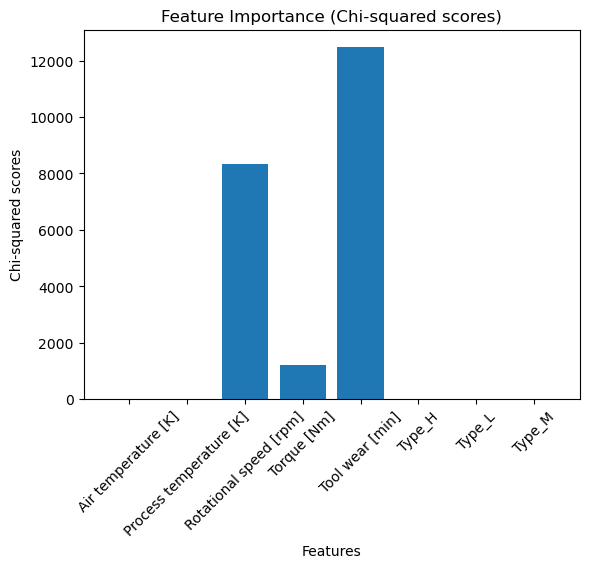

Selected features: Index(['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L',
       'Type_M'],
      dtype='object')


In [166]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
X = feature_df .drop(columns=['Machine failure', 'Failure Type'])  # Features
y = feature_df ['Failure Type']  # Target variable

# Apply feature selection using SelectKBest with chi2
selector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get names of selected features
selected_features = X.columns[selected_indices]

# Visualize the importance of selected features
scores = selector.scores_
plt.bar(range(len(scores)), scores)
plt.xticks(range(len(scores)), X.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Chi-squared scores')
plt.title('Feature Importance (Chi-squared scores)')
plt.show()

# Print names of selected features
print("Selected features:", selected_features)


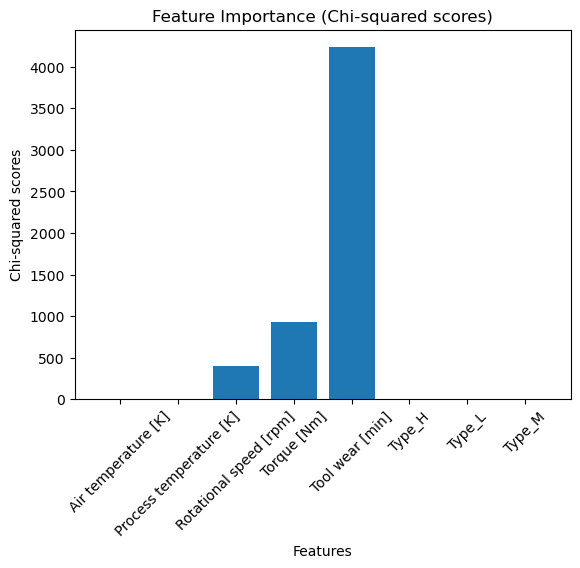

Selected features: Index(['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_H',
       'Type_L'],
      dtype='object')


In [173]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
X = feature_df .drop(columns=['Machine failure', 'Failure Type'])  # Features
y = feature_df ['Machine failure']  # Target variable

# Apply feature selection using SelectKBest with chi2
selector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get names of selected features
selected_features = X.columns[selected_indices]

# Visualize the importance of selected features
scores = selector.scores_
plt.bar(range(len(scores)), scores)
plt.xticks(range(len(scores)), X.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Chi-squared scores')
plt.title('Feature Importance (Chi-squared scores)')
plt.show()

# Print names of selected features
print("Selected features:", selected_features)


In [175]:
data

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                     1551.0         42.8              0.0                0   
1                     1408.0         46.3              3.0                0   
2                     1498.0         49.4              5.0                0   
3                     1433.0         39.5              7.0                0   
4                     1408.0         40.0              9.0                0   
...                      ...          ...              ...              ...   
9995                  1604.0         29.5             14.0                0   
9996                  1632.0         31.8             17.0                0   
9997                  1645.0         33.4             22.0                0   
9998                  1408.0         48.5             25.0                0   
9999                  1500.0         40.2             30.0                0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[9973 rows x 8 columns]

In [177]:
# Save DataFrame (data)
data.to_csv(r'C:\Users\USER\Documents\Python Scripts\Machine learning\Neural networks\Predictive Maintenance\predictive-maintenance-supervised-learning\data/new_dataframe.csv', index=False)

# Save DataFrame (encoded data)
data_encoded.to_csv(r'C:\Users\USER\Documents\Python Scripts\Machine learning\Neural networks\Predictive Maintenance\predictive-maintenance-supervised-learning\data/encoded_data.csv', index=False)


# Exploratory Data Analysis (EDA) Report

## Project Overview:

Predictive Maintenance with Supervised Learning aims to leverage machine learning techniques for proactive maintenance in industrial settings.
The project focuses on binary and multi-class classification to predict machine failures and determine the type of failure.
Objectives include detecting failure types and predicting failures within a given timeframe, contributing to operational efficiency and cost reduction in industries.
Key Findings:

## Data Overview:

- No missing data or duplicate values observed.
- Dataset comprises six numerical features (including UDI) and three categorical features (including ProductID).
- Significant class imbalance observed in both 'Machine Failure' (78.6%) and 'Failure Type' (88.7%).
    
## Data Preprocessing:

- Utilized SMOTECE to address imbalance in the dataset due to categorical variables.
- Removed rows where 'Machine Failure' is set to 1 but all types of failures are set to 0 (RNF).
    
## Outlier Detection:

- Identified potential outliers in 'Rotational Speed' and 'Torque' features.
- Recognized skewness in the distribution of 'Rotational Speed', suggesting potential machine failures with high values.

## Correlation Analysis:

- Positive correlation observed between 'Air Temperature' and 'Process Temperature'.
- Strong negative correlation detected between 'Torque' and 'Rotational Speed'.

## Peak Pattern Analysis:

- Explored peak patterns of machine failure concerning numerical features.
- Majority of machine failures occur in Low-quality type machines.
- 'Heat Dissipation' (HDF) and 'Tool Wear Failure' (TWF) are the most common failure types.

## Feature Importance:

- Conducted feature importance analysis using SelectKBest and chi2.
- Identified 'Tool Wear', 'Torque', and 'Rotational Speed' as the most important features for both failure types and machine failure.

## Conclusion:

The EDA provides valuable insights into the dataset, highlighting key relationships and patterns related to machine failures.
Additional feature engineering will be performed to enhance model performance, addressing imbalanced targets and introducing new features.
The findings align with project objectives, laying the groundwork for developing accurate predictive maintenance models.